In [4]:
from pathlib import Path
import pandas as pd

In [9]:
data_path = Path.cwd().parent/"data"
raw_folder_path = data_path/"raw"
ds_train_path = raw_folder_path/"train.csv"
ds_test_path = raw_folder_path/"test.csv"

In [40]:
# Data import
train =pd.read_csv(ds_train_path, index_col='PassengerId')
test = pd.read_csv(ds_test_path, index_col="PassengerId")

## Data Overview

In [41]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35

In [23]:
# Data head
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# statistics
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Concat training and test data set

In [51]:
test["Survived"]=-1

In [52]:
df = pd.concat([train, test])

C:\Users\starg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


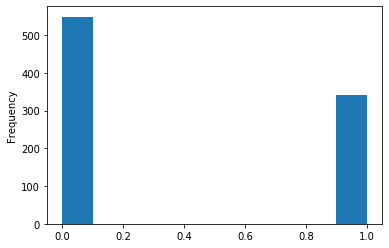

In [56]:
# Data visualization
%matplotlib inline
df[df["Survived"] != -1]["Survived"].plot(kind="hist")

In [58]:
# filter rows based on the condition
male_passengers = df[df["Sex"] == "male"]
# Or below
# male_passengers = train.loc[train["Sex"]=="male"]

In [59]:
male_passengers

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
...,...,...,...,...,...,...,...,...,...,...,...
1299,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1,male,1,-1,113503
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-1,A.5. 3236
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-1,SOTON/O.Q. 3101262


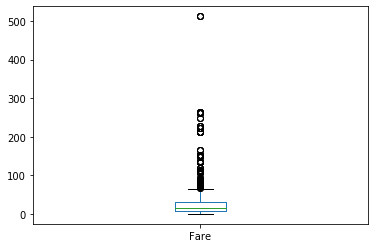

In [61]:
df["Fare"].plot(kind="box")

In [62]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-0.058060
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.760044
min,0.170000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-1.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [65]:
iqr = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
print("IQR: {0}".format(iqr))

IQR: 23.379199999999997


In [67]:
df[df["Fare"] > (df["Fare"].quantile(0.75) + 1.5*iqr)].

Age         153
Cabin       134
Embarked    169
Fare        171
Name        171
Parch       171
Pclass      171
Sex         171
SibSp       171
Survived    171
Ticket      171
dtype: int64

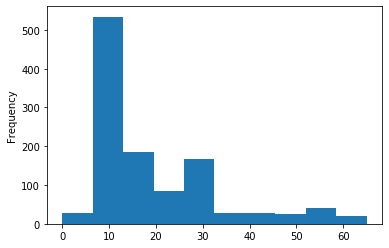

In [69]:
df[df["Fare"] <= (df["Fare"].quantile(0.75) + 1.5*iqr)].Fare.plot(kind="hist")

In [70]:
df.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-0.058060,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.760044,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-1.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-1.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [71]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [72]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [73]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

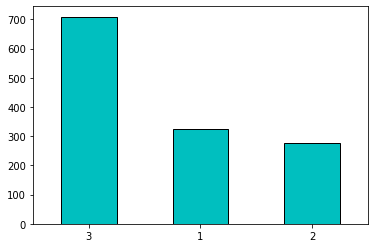

In [76]:
df.Pclass.value_counts().plot(kind="bar", color="c", ec="black", rot=0)

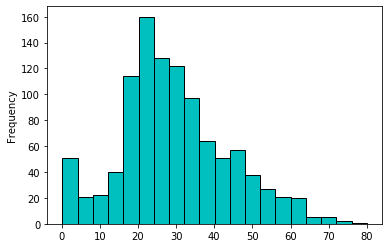

In [80]:
df.Age.plot(kind="hist", color="c", ec="black", bins=20)

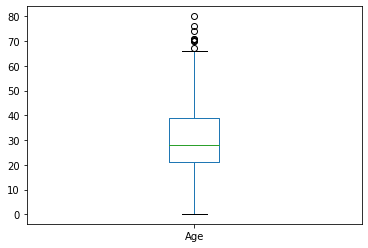

In [79]:
df.Age.plot(kind="box")

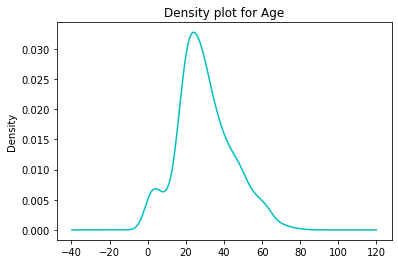

In [81]:
df.Age.plot(kind="kde", title="Density plot for Age", color="c")

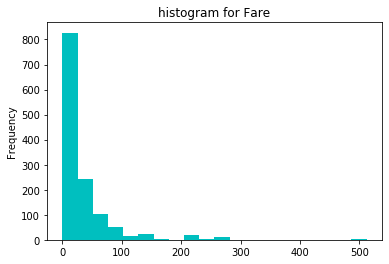

In [82]:
# Histrram for fare
df.Fare.plot(kind="hist", title="histogram for Fare", color="c", bins=20)

In [89]:
print("Skewness for fare : {0:.2f}".format(df.Fare.skew()))
print("Skewness for age : {0:.2f}".format(df.Age.skew()))

Skewness for fare : 4.37
Skewness for age : 0.41


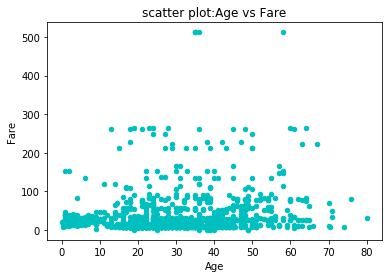

In [90]:
df.plot.scatter(x="Age", y="Fare", color="c", title="scatter plot:Age vs Fare")

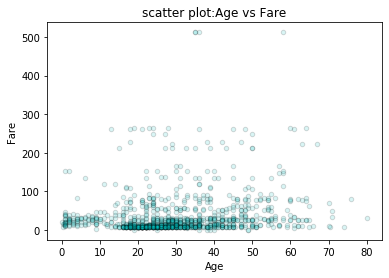

In [93]:
df.plot.scatter(x="Age", y="Fare", color="c", title="scatter plot:Age vs Fare", alpha=0.15, ec="black")

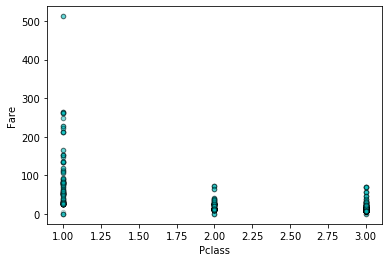

In [95]:
df.plot.scatter(x="Pclass", y="Fare", color="c", ec="black", alpha=0.2)

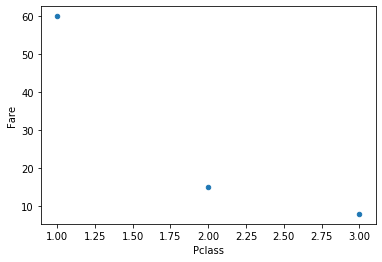

In [112]:
df.groupby("Pclass")["Pclass","Fare", "Age"].median().plot.scatter(x="Pclass", y="Fare")

In [113]:
df.groupby("Pclass").agg({"Fare": "mean", "Age": "median"})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [114]:
df.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Crosstab

In [116]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


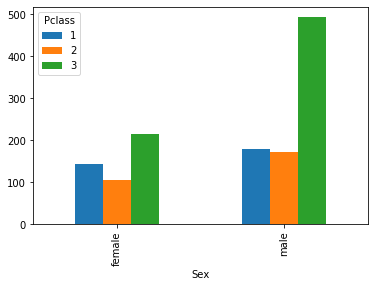

In [117]:
pd.crosstab(df.Sex, df.Pclass).plot(kind="bar")

### Pivot Table

In [119]:
df.pivot_table(index="Sex", columns="Pclass", values="Age", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [122]:
df.groupby(["Sex", "Pclass"])["Age"].mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging : Working with missing values

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [124]:
# extract rows with Embaked as Null
df[df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [125]:
# how many people embaked at different points?
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [126]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [133]:
# df.loc[df["Embarked"].isnull(), "Embarked"]
# df2 = df["Embarked"].fillna("S", inplace=False)

In [145]:
pd.__version__

'0.25.1'

In [184]:
# Option 2 : explore the fare of each class for each embarkment point
# df.groupby("Embarked").agg({"Fare": {"mean", "median", "max", "min", "75% quantile": lambda x: x.quantile(0.75), lambda x: x.quantile(0.25)}})
import numpy as np
df.groupby(["Pclass", "Embarked"])["Fare"].agg([
    np.mean,
    np.median,
    np.max,
    np.min,
    lambda x: x.quantile(0.75),
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75) - x.quantile(0.25) 
    ]
)

#df.groupby("Embarked")["Fare", "Age"].agg(
#    mean_fare=np.mean,
#    median_fare=np.median,
#    max_fare=np.max,
#    min_fare=np.min
#    percentile_75=lambda x: x.quantile(0.75)
#)

#df.groupby("Embarked").Fare.agg(a=lambda x: x.quantile(0.75), b=lambda x: x.quantile(0.25))

mean   median      amax     amin  <lambda_0>  \
Pclass Embarked                                                       
1      C         106.845330  76.7292  512.3292  25.7417   134.50000   
       Q          90.000000  90.0000   90.0000  90.0000    90.00000   
       S          72.148094  52.0000  263.0000   0.0000    83.47500   
2      C          23.300593  15.3146   41.5792  12.0000    31.80415   
       Q          11.735114  12.3500   12.3500   9.6875    12.35000   
       S          21.206921  15.3750   73.5000   0.0000    26.00000   
3      C          11.021624   7.8958   22.3583   4.0125    14.45830   
       Q          10.390820   7.7500   29.1250   6.7500     7.87920   
       S          14.435422   8.0500   69.5500   0.0000    15.90000   

                 <lambda_1>  <lambda_2>  
Pclass Embarked                          
1      C           49.50420    84.99580  
       Q           90.00000     0.00000  
       S           26.55000    56.92500  
2      C           13.86145    17.94270  
       Q           11.52915     0.82085  
       S           13.00000    13.00000  
3      C            7.22920     7.22910  
       Q            7.75000     0.12920  
       S            7.85420     8.04580

In [185]:
# replace the missing value is "C"
df.Embarked.fillna("c", inplace=True)

In [187]:
# No empty result
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Imputing Fare

In [190]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-1,3701


In [195]:
df[(df["Pclass"]==1) & (df["Embarked"]=="S")].Fare.agg(["median", "mean"])

median    52.000000
mean      72.148094
Name: Fare, dtype: float64

In [196]:
median_fare = df.loc[(df["Pclass"]==1) & (df["Embarked"]=="S"), "Fare"].median()

In [198]:
df["Fare"].fillna(median_fare, inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Imputing Age

In [201]:
df[df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-1,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-1,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-1,A.5. 3236


#### Option 1: replace all missing age with mean value

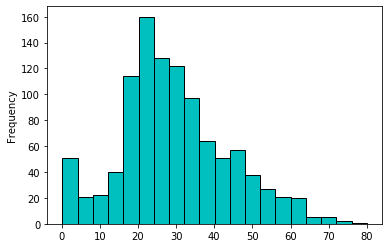

In [205]:
df["Age"].plot(kind="hist", bins=20, color="c", ec="black");

In [203]:
df.Age.mean()

29.881137667304014

In [204]:
df.Age.median()

28.0

#### Optioin 2: replave with median age of gender

In [207]:
df.groupby("Sex")["Age"].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

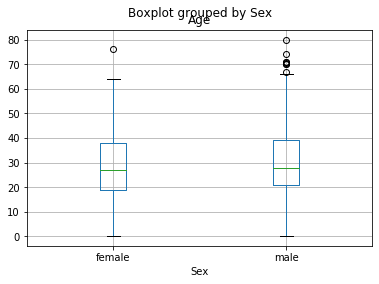

In [216]:
df[df["Age"].notnull()].boxplot("Age", "Sex");

In [221]:
def isOutlier(series):
    percentile_75 = series.quantile(0.75)
    percentile_25 = series.quantile(0.25)
    iqr = percentile_75 - percentile_25

    return series.map(lambda x: (x >= percentile_75 + iqr*1.5) | (x <=percentile_25 - iqr*1.5))

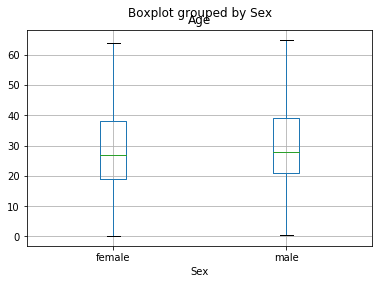

In [231]:
df[~isOutlier(df["Age"]) & df["Age"].notnull()].boxplot("Age", "Sex")

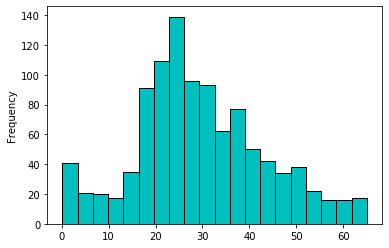

In [232]:
df[~isOutlier(df["Age"]) & df["Age"].notnull()]["Age"].plot(kind="hist", color="c", ec="black", bins=20)

In [235]:
# Replce: (but we found Sex feature is not good choce to detet Age)
age_sex_median = df.groupby("Sex")["Age"].transform("median")
age_sex_median

PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
        ... 
1305    28.0
1306    27.0
1307    28.0
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64

#### Option 3 : replace with median age of Pclass

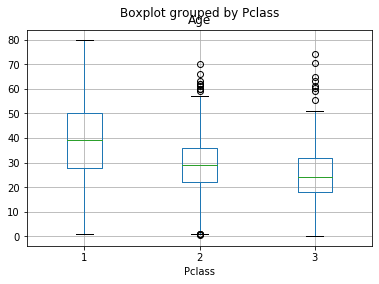

In [238]:
df[df["Age"].notnull()].boxplot("Age", "Pclass");

#### Option 4: replace with median age of title

In [239]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [257]:
def getTitle(name):
    title_group= {"mr": "Mr",
                 "mrs": "Mrs",
                 "miss": "Miss",
                 "master": "Master",
                 "don": "Sir",
                 "rev": "Sir",
                 "dr": "Officer",
                 "mme": "Mrs",
                 "ms": "Mrs",
                 "major": "Officer",
                 "lady": "Lady",
                 "sir": "Sir",
                 "mlle": "Miss",
                 "col": "Officer",
                 "capt": "Officer",
                 "the countess": "Lady",
                 "jonkheer": "Sir",
                 "dona": "Lady"}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [258]:
df["Name"].map(getTitle)

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [259]:
df.Name.map(getTitle).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [256]:
#df[df["Name"].map(getTitle).isin(["jonkheer", "capt", "mme", "rev", "don"])]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
31,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,1,male,0,0,PC 17601
150,42.0,NaN,S,13.0000,"Byles, Rev. Thomas Roussel Davids",0,2,male,0,0,244310
151,51.0,NaN,S,12.5250,"Bateman, Rev. Robert James",0,2,male,0,0,S.O.P. 1166
250,54.0,NaN,S,26.0000,"Carter, Rev. Ernest Courtenay",0,2,male,1,0,244252
370,24.0,B35,C,69.3000,"Aubart, Mme. Leontine Pauline",0,1,female,0,1,PC 17477
627,57.0,NaN,Q,12.3500,"Kirkland, Rev. Charles Leonard",0,2,male,0,0,219533
746,70.0,B22,S,71.0000,"Crosby, Capt. Edward Gifford",1,1,male,1,0,WE/P 5735
823,38.0,NaN,S,0.0000,"Reuchlin, Jonkheer. John George",0,1,male,0,0,19972
849,28.0,NaN,S,33.0000,"Harper, Rev. John",1,2,male,0,0,248727


In [261]:
df["Title"] = df.Name.map(getTitle)

In [262]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


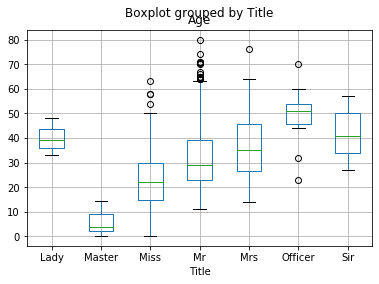

In [264]:
df[df["Age"].notnull()].boxplot("Age", "Title");

In [265]:
title_age_median = df.groupby("Title")["Age"].transform("median")
df["Age"].fillna(title_age_median, inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [272]:
df[df["Cabin"].notnull()]["Survived"].value_counts()

 1    136
-1     91
 0     68
Name: Survived, dtype: int64

In [279]:
df[df["Cabin"].notnull() & df["Survived"]==1].Cabin.map(lambda x: str(x)[0]).value_counts()

C    70
B    53
D    38
E    33
F    16
A    14
G     3
Name: Cabin, dtype: int64

In [280]:
df[df["Cabin"].notnull() & df["Survived"]==0].Cabin.map(lambda x: str(x)[0]).value_counts()

n    1014
C      24
B      12
E       8
A       8
D       8
F       5
G       2
T       1
Name: Cabin, dtype: int64

## Working with outliers

### Age

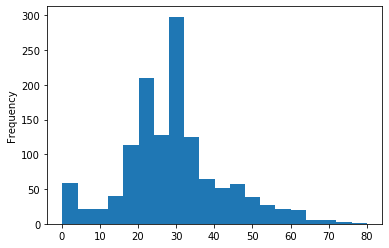

In [282]:
df.Age.plot(kind="hist", bins=20);

In [284]:
df.loc[df["Age"] > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-1,19877,Mrs


### Fare

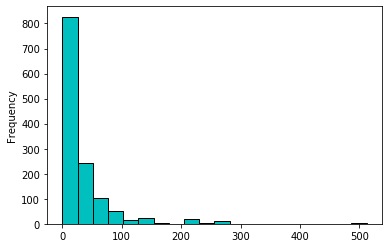

In [286]:
df.Fare.plot(kind="hist", bins=20, color="c", ec="black");

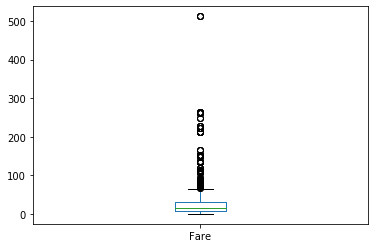

In [288]:
df["Fare"].plot(kind="box");

In [289]:
df.loc[df["Fare"]==df["Fare"].max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-1,PC 17755,Mrs


In [290]:
LogFare = np.log(df.Fare+ 1)

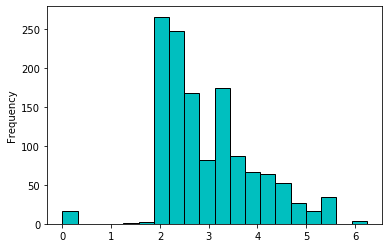

In [293]:
LogFare.plot(kind="hist", color="c", ec="black", bins=20);

In [295]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [296]:
pd.qcut(df.Fare, 4, labels=["very_low", "low", "high", "very_high"])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

In [297]:
df["Fare_Bin"] = pd.qcut(df.Fare, 4, labels=["very_low", "low", "high", "very_high"])

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 174.4+ KB


## Feature Engineering

### Feature : Age State (Adult or Child)

In [302]:
# AgeState based on Age
df["AgeState"] = np.where(df["Age"] >= 18, "Adult", "Child")

In [309]:
pd.crosstab(df[df["Survived"]!=-1]["AgeState"], df[df["Survived"]!=-1]["Survived"])

Survived,0,1
AgeState,,
Adult,495,279
Child,54,63


### Feature: FamilySize

In [311]:
df[["Parch", "SibSp"]]

,Parch,SibSp
PassengerId,,
1,0,1
2,0,1
3,0,0
4,0,1
5,0,0
...,...,...
1305,0,0
1306,0,0
1307,0,0


### Feature : FamilySize

In [313]:
df["FamilySize"] = df.Parch + df.SibSp + 1 # 1 for self

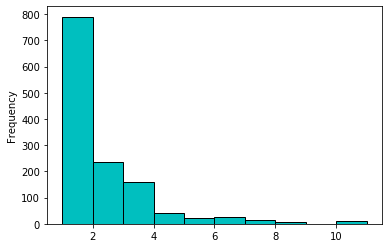

In [316]:
df["FamilySize"].plot(kind="hist", color="c", ec="black");

In [319]:
# Furthre explore this family with max family members
df.loc[df["FamilySize"] == df["FamilySize"].max(), ["Name", "Survived", "FamilySize", "Ticket"]]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-1,11,CA. 2343
1234,"Sage, Mr. John George",-1,11,CA. 2343


In [320]:
pd.crosstab(df[df["Survived"] != -1]["Survived"], df[df["Survived"] != -1]["FamilySize"])

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

In [323]:
df["IsMother"] = np.where(((df.Sex == "female") & (df.Parch > 0) & (df.Age > 18) & (df.Title != "Miss")), 1, 0)

In [324]:
pd.crosstab(df[df["Survived"]!=-1]["Survived"], df[df["Survived"] != -1]["IsMother"])

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [325]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [326]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [328]:
# Cabin T is different syntax from others
df[df["Cabin"] == "T"]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [330]:
# set the value to NaN
df.loc[df["Cabin"] == "T", "Cabin"] = np.NaN

In [331]:
# look at the unique values of Cabin again
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [332]:
# Extract first character
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), "Z")
df["Deck"] = df["Cabin"].map(get_deck)

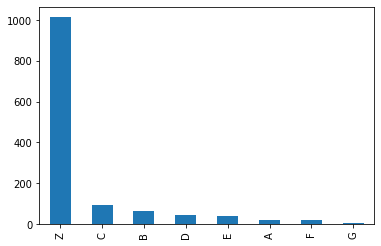

In [336]:
df["Deck"].value_counts().plot(kind="bar")

In [339]:
pd.crosstab(df[df["Survived"] != -1]["Survived"], df[df["Survived"] != -1]["Deck"])

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


### Categorical Feature Encoding

In [341]:
# sex
df["IsMale"] = np.where(df.Sex == "male", 1, 0)

In [342]:
# Columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df, columns=["Deck", "Pclass", "Title", "Fare_Bin", "Embarked", "AgeState"])

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 40 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### Drop and Reorder columns

In [344]:
# drop columns
df.drop(["Cabin", "Name", "Ticket", "Parch", "SibSp", "Sex"], axis=1, inplace=True)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 34 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [346]:
# reorder columns
columns = [column for column in df.columns if column != "Survived"]
columns = ["Survived"] + columns

In [347]:
print(columns)

['Survived', 'Age', 'Fare', 'FamilySize', 'IsMother', 'IsMale', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Fare_Bin_very_low', 'Fare_Bin_low', 'Fare_Bin_high', 'Fare_Bin_very_high', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_c', 'AgeState_Adult', 'AgeState_Child']


In [348]:
df = df[columns]

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 34 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save processed dataset

In [350]:
import os

In [353]:
processed_data_path = os.path.join(os.path.pardir, "data", "processed")
print(processed_data_path)
write_train_path = os.path.join(processed_data_path, "train.csv")
write_test_path = os.path.join(processed_data_path, "test.csv")

..\data\processed


In [ ]:
# train data
df.loc[df["Survived"] != -1].to_csv(write_train_path)
# test data
columns = [column for column in df.columns if column != "Survived"]
df.loc[df"Survived"]